Daniel Velasquez

In [21]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

In [11]:
df = pd.DataFrame([[3,"si"],
                  [4,"no"],
                  [4.3,"si"],
                  [4.5,"si"],
                  [5,"no"],
                  [6,"no"],
                  [7,"si"],
                  [7.2,"si"],
                  [8,"no"]], columns = ["x", "y"])

In [12]:
df

,x,y
0,3.0,si
1,4.0,no
2,4.3,si
3,4.5,si
4,5.0,no
5,6.0,no
6,7.0,si
7,7.2,si
8,8.0,no


In [22]:
kf_cv = KFold(n_splits=3, shuffle=False)
r = cross_validate(DecisionTreeClassifier(max_depth=1),
                   df[['x']],
                   df['y'],
                   cv = kf_cv.split(df),
                   return_estimator = True,
                   scoring = ["accuracy"],
                   return_train_score = True)

In [23]:
r

{'fit_time': array([0.00423813, 0.00190616, 0.00211477]),
 'score_time': array([0.00181603, 0.00132275, 0.00136185]),
 'estimator': [DecisionTreeClassifier(max_depth=1),
  DecisionTreeClassifier(max_depth=1),
  DecisionTreeClassifier(max_depth=1)],
 'test_accuracy': array([0.66666667, 0.33333333, 0.33333333]),
 'train_accuracy': array([0.66666667, 0.83333333, 0.83333333])}

Los resultados dados por cross_validate para el test score es de 

* 0.666 o 66.66% para el experimento 1
* 0.333 o 33.33% para el experimento 2
* 0.333 o 33.33% para el experimento 3

En comparacion con el modelo hecho a mano, se tiene lo siguiente

Experimento 1:


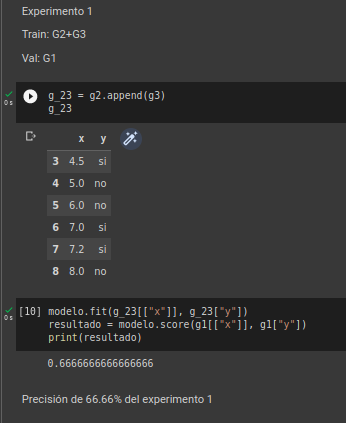

Con score de 66.66%

Experimento 2:

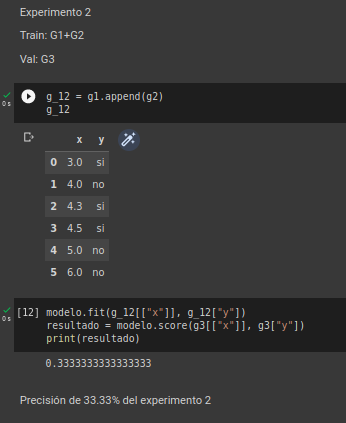

Con score de 33.33%

Experimento 3:

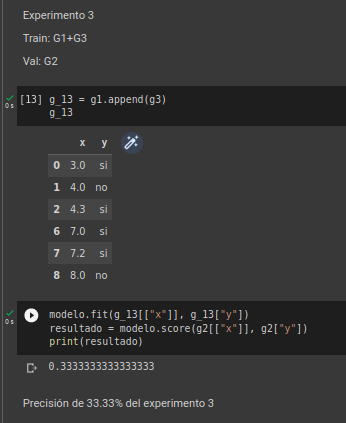

Con score de 33.33%

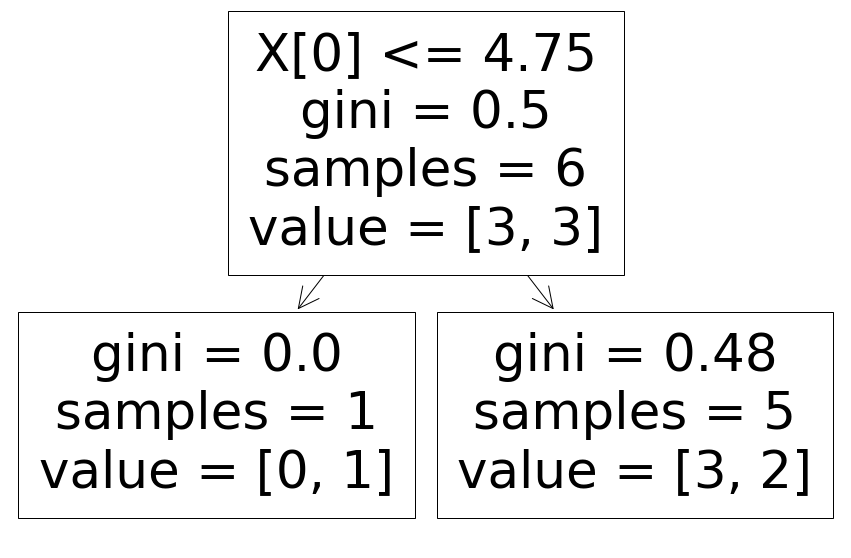

In [24]:
plt.figure(figsize=(15,10))
plot_tree(r['estimator'][0])
plt.show()

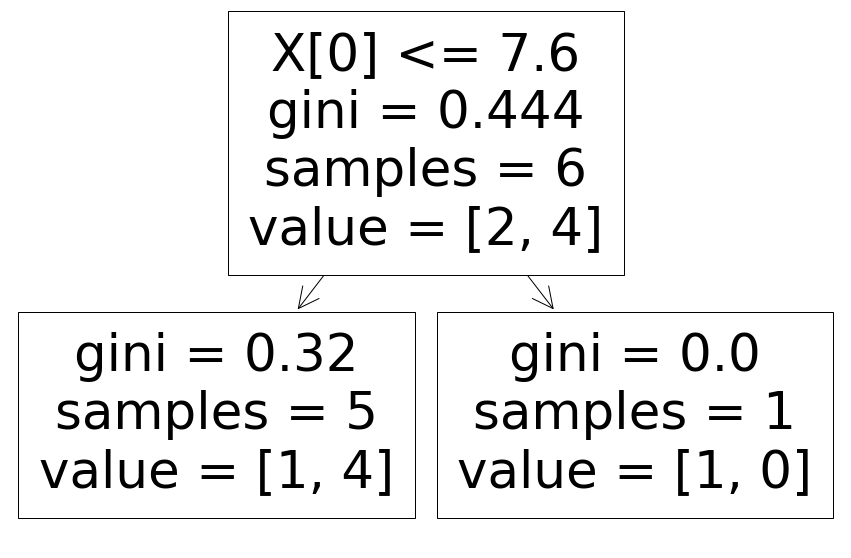

In [25]:
plt.figure(figsize=(15,10))
plot_tree(r['estimator'][1])
plt.show()

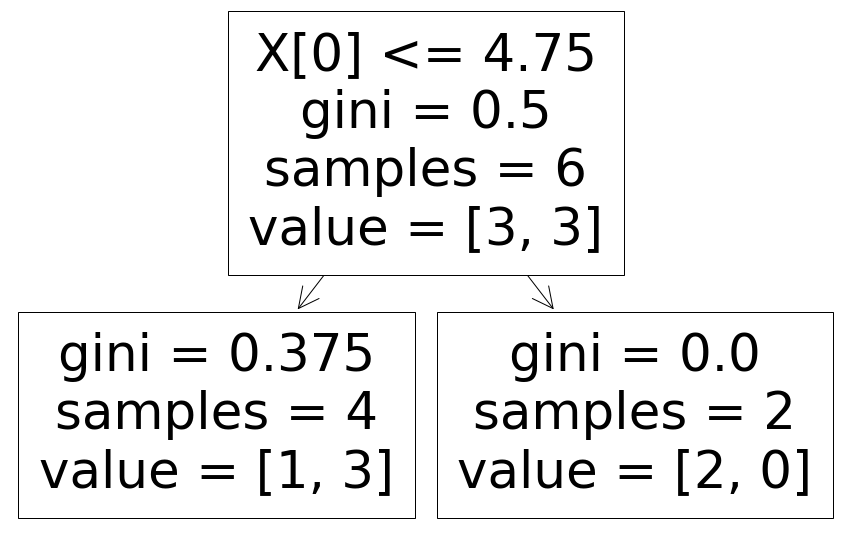

In [26]:
plt.figure(figsize=(15,10))
plot_tree(r['estimator'][2])
plt.show()